# Usando *Machine Learning* para prever valores de casas em *King County, WA*

<p align="center">
    <img width=750, src="https://github.com/DanOliveira-DS/Datasets_for_Practicing_Applied_Machine_Learning/blob/master/imgs/king_county.jpg?raw=true">
</p>




# Contexto do Desafio
A House Rocket é uma plataforma digital que tem como modelo de negócio, a compra e a venda de imóveis usando tecnologia.

Você é um Data Scientist contrato pela empresa para ajudar a encontrar as melhores oportunidades de negócio no mercado de imóveis. O CEO da House Rocket gostaria de maximizar a receita da empresa encontrando boas oportunidades de negócio.

Sua principal estratégia é comprar boas casas em ótimas localizações com preços baixos e depois revendê-las posteriormente à preços mais altos. Quanto maior a diferença entre a compra e a venda, maior o lucro da empresa e portanto maior sua receita.

Entretanto, as casas possuem muitos atributos que as tornam mais ou menos atrativas aos compradores e vendedores e a localização e o período do ano também podem influenciar os preços.

Portanto, seu trabalho como Data Scientist é responder as seguinte perguntas:

* Quais casas o CEO da House Rocket deveria comprar e por qual preço de compra?
* Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?
* A House Rocket deveria fazer uma reforma para aumentar o preço da venda? Quais seriam as sugestões de mudanças? 
* Qual o incremento no preço dado por cada opção de reforma?

Para avaliar a performance do nosso modelo vamos utilizar:

* Raiz quadrada do erro-médio - 
$RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$

* pontuacao r ao quadrado - $R^2 score$

# Dados do desafio
O conjunto de dados que representam o contexto está disponível na plataforma do [Kaggle](https://www.kaggle.com/harlfoxem/housesalesprediction). Esse conjunto de dados contém casas vendidas entre Maio de 2014 e Maio de 2015

# Roteiro Sugerido para a Resolução.
Esse é o roteiro de resolução:

1. Identifique a causa raíz.
    * Porque o CEO fez essas perguntas? Se você fosse ele, porque você perguntaria isso? Quer aumentar receita? A empresa está indo bem?
    * Anote essas causas.
2. Colete os dados ( Os dados estão no link acima )
3. Aplique uma limpeza nos dados.
    * Entenda as variáveis disponíveis, possíveis valores faltantes, faça uma estatística descritiva para entender as características dos dados.
4. Levante Hipóteses sobre o Comportamento do Negócio.
    * Casas com garagens são mais caras? Porque?
    * Casas com muitos quartos são mais caras? Porque? A partir de quantos quartos o preço aumenta? Qual o incremento de preço por cada quarto adicionado?
    * As casas mais caras estão no centro? Qual a região? Existe alguma coisa na região que tem correlação com valor de venda da casa? Shoppings? Montanhas? Pessoas Famosas?
5. Faça uma ótima Análise Exploratória de Dados.
    * Quais hipóteses são falsas e quais são verdadeiras?
    * Quais as correlações entre as variáveis e a variável resposta?
6. Escreve os Insights que você encontro.
7. Escreve possíveis soluções para o problema do CEO.

# Importando bibliotecas e conjunto de dados

In [1]:
# bilioteca para analise de dados
import numpy as np
import pandas as pd

from datetime import datetime

# visualizacao de dados
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

# setando opcoes globais do pandas
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

# bibliotecas para visualização dos dados
%matplotlib inline
%config InlineBackend.figure_format = "svg"

# setando config de visualizacao
plt.rcParams["font.family"] = "sans-serif"
sns.set_style("white")


In [2]:
# importando conjunto de dados
housing = pd.read_csv("csv files/kc_house_data.csv")

# Conhecendo o conjunto de dados

In [3]:
# dimensao do conjunto de dados
print("Dimensao do conjunto de dados:")
print(f"Entradas: {housing.shape[0]}")
print(f"Variaveis: {housing.shape[1]}")

Dimensao do conjunto de dados:
Entradas: 21613
Variaveis: 21


In [4]:
# primeira entrdas
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Dicionário de Variáveis

* id: É o número numérico único atribuído a cada casa a ser vendida..
* date: Data em que a casa foi vendida.
* price: É o preço da casa que temos que prever, então esta é nossa variável-alvo e um valor a partir dele são nossas características.
* bedrooms: Determina o número de quartos em uma casa.
* bathrooms: Determina o número de banheiros em um quarto de uma casa.
* sqft_living: É a variável de medida que determina a medida da casa em pés quadrados.
* sqft_lot: É a variável de medida que determina o pé quadrado do lote.
* floors: Total de pisos (níveis) na casa.
* waterfront: Casa com vista para a beira-mar 0 significa não 1 significa sim.
* view: Este recurso determina se uma casa foi visualizada ou não. 0 significa não 1 significa sim.
* condition: Determina a condição geral de uma casa em uma escala de 1 a 5.
* grade: Determina a classificação geral atribuída à unidade habitacional, com base no sistema de classificação de King County em uma escala de 1 a 13.
* sqft_above: Determina a metragem quadrada da casa além do porão.
* sqft_basement: Determina a metragem quadrada do porão da casa.
* yr_built: Determina a data de construção da casa.
* yr_renovated: Ano em que a casa foi reformada.
* zipcode: Código postal.
* lat: Coordenada de latitude.
* long: Coordenada de longitude.
* sqft_living15: Área da sala de estar em 2015 (implica-- algumas reformas) Isso pode ou não ter afetado o tamanho do lote.
* sqft_lot15: Área lotSize em 2015 (implica-- algumas renovações).

In [5]:
# tipos dos dados
housing.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Temos apenas uma variavel categorica que e a data em qual a casa foi vendida. 

In [6]:
housing["ano"] = housing["date"].str[:4]
housing["mes"] = housing["date"].str[4:6]
housing["dia"] = housing["date"].str[6:8]
housing["data"] = housing["ano"]+"-"+housing["mes"]+"-"+housing["dia"]

Agora vamos transformar nossa variavel `data` que esta no tipo *object* para datetime

In [7]:
for column in ["data"]:
    housing[column] = pd.to_datetime(housing[column], errors='coerce')

Excluindo variaveis reduntantes e desnecessárias [`date`,`ano`,`mes` , `dia` e `id`]

In [8]:
# usando drop para exlcuir a variavel
housing.drop(["id", "date","ano","mes","dia"], axis=1, inplace=True)

# reordenando colunas
housing = housing[['data', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
                  'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
                  'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
                  'sqft_living15', 'sqft_lot15', 'price']].rename(columns={"data":"date"})

In [9]:
# visualizando novo conjunto de dados
housing.head()

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900.0
1,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000.0
2,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000.0
3,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000.0
4,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000.0


In [10]:
# visualizando tipos dos dados
housing.dtypes

date             datetime64[ns]
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
price                   float64
dtype: object

Agora temos todas as variaveis bem representadas.


In [11]:
# verificando valores ausentes
housing.isna().sum()

date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
price            0
dtype: int64

Nosso conjunto de dados e bem limpo, nenhuma das nossas variaveis apresentou valores ausentes.

# Estatisticas de Resumo

In [12]:
# describe
housing.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


Observando as estatísticas do DataFrame de variáveis númericas, podemos perceber as seguintes características:

As variaveis `bedrooms` e `bathrooms` sao aquelas que apresentaram valores discrepantes mais significativos.

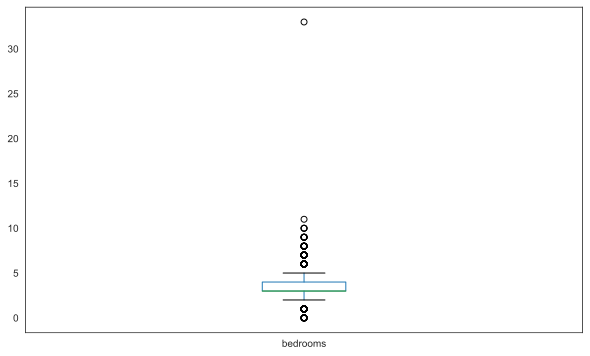

In [15]:
housing["bedrooms"].plot(kind="box", figsize=(10, 6))